Analyzing Portland's voterfile to distinguish between white conservatives, white moderate, and POC. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 


In [3]:
file_path = 'portlandfile.csv'
column_names = [
    'Voter File VANID', 'DWID', 'Sex', 'Address', 'City', 'State', 'Zip5', 'Zip4', 'AddressID',
    'Latitude', 'Longitude', 'PrecinctName', 'Age', 'Inc', 'Ideo22', 'VCI22', '2022:VProp', 'VoteProp24',
    'Asian', 'Black', 'Caucasian', 'Hispanic', 'NatAmer', 'General23', 'General22', 'General21', 'General20',
    'General19', 'General18', 'General17', 'General16', 'General15', 'General14', 'General13', 'General12',
    'General11', 'General10', 'General09', 'General08', 'General06', 'General05', 'General04', 'General02',
    'General00', 'MayMunicipal17', 'NovemberSpecial07', 'PresPrimary12', 'PresPrimary12Party', 'PresPrimary08',
    'PresPrimary08Party', 'PresPrimary(av)20', 'PresPrimary(av)16', 'Primary23', 'Primary23Party', 'Primary22',
    'Primary22Party', 'Primary21', 'Primary21Party', 'Primary19', 'Primary19Party', 'Primary18', 'Primary18Party',
    'Primary17', 'Primary17Party', 'Primary15', 'Primary15Party', 'Primary14', 'Primary14Party', 'Primary13',
    'Primary13Party', 'Primary12', 'Primary12Party', 'Primary11', 'Primary11Party', 'Primary10', 'Primary10Party',
    'Primary09', 'Primary09Party', 'Primary08', 'Primary08Party', 'Primary06', 'Primary04', 'Primary02', 'Primary00',
    'Primary(av)20', 'Primary(av)16', 'Special23', 'Special22', 'Special21', 'Special20', 'Special19', 'Special18',
    'Special17', 'Special16', 'Special15', 'Special14', 'Special13', 'Special12', 'Special11', 'Special10',
    'Special09', 'Special08', 'Special07', 'Special06', 'Special05', 'Special04', 'Special03', 'Special02',
    'Special01', 'Special00'
]
vf_df = pd.read_csv(file_path, names=column_names, header=0)
print(vf_df)

/var/folders/fx/8zx0kq117y7638dxpz5lll800000gn/T/ipykernel_69511/3434543665.py:19: DtypeWarning: Columns (11,23,40,53,59,65,77,103,109) have mixed types. Specify dtype option on import or set low_memory=False.
  vf_df = pd.read_csv(file_path, names=column_names, header=0)


        Voter File VANID         DWID Sex                Address      City  \
0                5159143  542493377.0   M      4246 SW Vesta St   Portland   
1                5159698  542520382.0   F   12439 NE Russell St   Portland   
2                5160280  542504871.0   F  12530 NE Holladay Pl   Portland   
3                5160330  542520507.0   U      6829 SE 67th Ave   Portland   
4                5160748  542520935.0   M     4315 SE 141st Ave   Portland   
...                  ...          ...  ..                    ...       ...   
445753           5078512  540658703.0   M      4915 SE 75th Ave   Portland   
445754           3963713  335218984.0   F     3614 NE 150th Ave   Portland   
445755           3965117  335220466.0   M   12605 SE Sherman St   Portland   
445756           3965864  335221254.0   F      7906 SE 65th Ave   Portland   
445757           3965040  335220386.0   F      2625 SE 13th Ave   Portland   

       State     Zip5    Zip4    AddressID   Latitude  ...  Spe

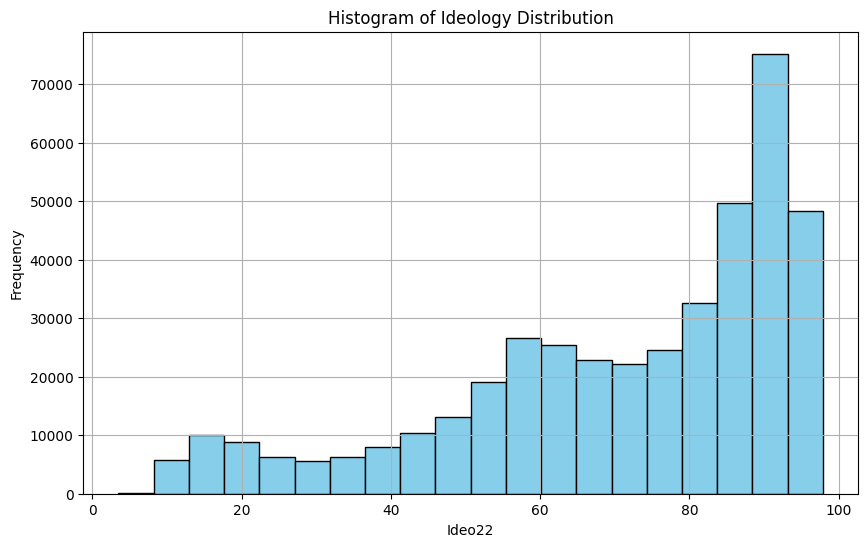

In [4]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.hist(vf_df['Ideo22'], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Ideo22')
plt.ylabel('Frequency')
plt.title('Histogram of Ideology Distribution')
plt.grid(True)
plt.show()

In [26]:
vf_df['Demo_Labels'] = ''

In [27]:
# label white conservatives
vf_df.loc[(vf_df['Ideo22'] <20) & (vf_df['VCI22'] < 30), 'Demo_Labels'] = 'WC'
# label white progressives
vf_df.loc[(vf_df['Ideo22'] >80) & (vf_df['VCI22'] > 70), 'Demo_Labels'] = 'WP'

In [29]:
print(vf_df['Demo_Labels'])

0         WP
1         WP
2         WP
3           
4           
          ..
445753      
445754    WP
445755      
445756    WP
445757    WP
Name: Demo_Labels, Length: 445758, dtype: object


      231093
WP    199529
WC     15136
Name: Demo_Labels, dtype: int64


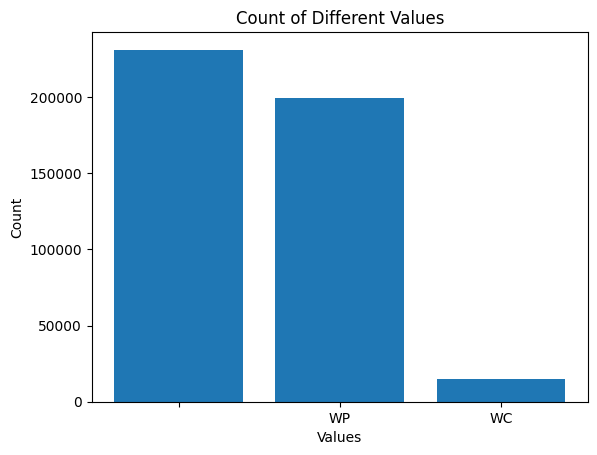

In [30]:
white_counts = vf_df['Demo_Labels'].value_counts()
print(white_counts)
# Plotting the count of different values
plt.bar(white_counts.index, white_counts.values)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Different Values')
plt.show()